### 1. Importing libraries and data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

In [4]:
path = r'C:\Users\nodnarb\Documents\Machine Learning'

In [6]:
# Importing cleaned weather station data

df = df = pd.read_csv(os.path.join(path, '01 Data Sets', 'weather_cleaned.csv'))

In [8]:
# Importing pleasant weather data

pleasant = pd.read_csv(os.path.join(path, '01 Data Sets', 'pleasant_weather.csv'))

In [10]:
df.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  19600101      1                  7            0.85           1.018   
1  19600102      1                  6            0.84           1.018   
2  19600103      1                  8            0.90           1.018   
3  19600104      1                  3            0.92           1.018   
4  19600105      1                  6            0.95           1.018   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.32                 0.09             0.7   
1                    0.36                 1.05             1.1   
2                    0.18                 0.30             0.0   
3                    0.58                 0.00             4.1   
4                    0.65                 0.14             5.4   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
0              6.5             0.8  ...                 4.9   
1              6.1             3.3  ...                 5.0   
2              8.5             5.1  ...                 4.1   
3              6.3             3.8  ...                 2.3   
4              3.0            -0.7  ...                 4.3   

   VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
0                     5               0.88             1.0003   
1                     7               0.91             1.0007   
2                     7               0.91             1.0096   
3                     7               0.86             1.0184   
4                     3               0.80             1.0328   

   VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
0                       0.45                    0.34                4.7   
1                       0.25                    0.84                0.7   
2                       0.17                    0.08                0.1   
3                       0.13                    0.98                0.0   
4                       0.46                    0.00                5.7   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0                 8.5                6.0               10.9  
1                 8.9                5.6               12.1  
2                10.5                8.1               12.9  
3                 7.4                7.3               10.6  
4                 5.7                3.0                8.4  

[5 rows x 137 columns]

In [12]:
pleasant.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
0  19600101                       0                          0   
1  19600102                       0                          0   
2  19600103                       0                          0   
3  19600104                       0                          0   
4  19600105                       0                          0   

   BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
0                            0                        0   
1                            0                        0   
2                            0                        0   
3                            0                        0   
4                            0                        0   

   MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
0                          0                      0   
1                          0                      0   
2                          0                      0   
3                          0                      0   
4                          0                      0   

   SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   VALENTIA_pleasant_weather  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0

### 2. Data Prep

In [21]:
# Filtering weather station to only show decade 2000

df2000 = df[(df['DATE'].astype(str).str[:4] >= '2000') & (df['DATE'].astype(str).str[:4] <= '2009')]
df2000.head()

DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610  20000101      1                  8            0.89          1.0286   
14611  20000102      1                  8            0.87          1.0318   
14612  20000103      1                  5            0.81          1.0314   
14613  20000104      1                  7            0.79          1.0262   
14614  20000105      1                  5            0.90          1.0246   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   

       BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_max  \
14610              2.9             1.6  ...                 0.7   
14611              3.6             2.7  ...                 2.0   
14612              2.2             0.1  ...                 2.8   
14613              3.9             0.5  ...                 4.6   
14614              6.0             3.8  ...                 2.9   

       VALENTIA_cloud_cover  VALENTIA_humidity  VALENTIA_pressure  \
14610                     6               0.89             1.0235   
14611                     8               0.92             1.0177   
14612                     4               0.79             1.0154   
14613                     6               0.76             1.0099   
14614                     7               0.81             0.9957   

       VALENTIA_global_radiation  VALENTIA_precipitation  VALENTIA_sunshine  \
14610                       0.22                    0.10                0.7   
14611                       0.13                    0.42                0.0   
14612                       0.22                    1.05                1.2   
14613                       0.36                    0.34                3.5   
14614                       0.12                    0.33                0.0   

       VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
14610                 6.6                2.1               11.0  
14611                 9.6                7.3               10.6  
14612                 8.6                7.3                9.9  
14613                 8.1                5.0                7.7  
14614                 7.7                4.0               11.3  

[5 rows x 137 columns]

In [23]:
# Filtering pleasant data to only show decade 2000

pleasant2000 = pleasant[(pleasant['DATE'].astype(str).str[:4] >= '2000') & (pleasant['DATE'].astype(str).str[:4] <= '2009')]
pleasant2000.head()

DATE  BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610  20000101                       0                          0   
14611  20000102                       0                          0   
14612  20000103                       0                          0   
14613  20000104                       0                          0   
14614  20000105                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                          0                      0   
14612                          0                      0   
14613                          0                      0   
14614                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
14610                           0                           0   
14611                           0                           0   
14612                           0                           0   
14613                           0                           0   
14614                           0                           0   

       VALENTIA_pleasant_weather  
14610                          0  
14611                          0  
14612                          0  
14613                          0  
14614                          0

In [25]:
# Dropping date and month column from weather data

df2000 = df2000.drop(columns = ['DATE', 'MONTH'])
df2000.head()

BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
14610                  8            0.89          1.0286   
14611                  8            0.87          1.0318   
14612                  5            0.81          1.0314   
14613                  7            0.79          1.0262   
14614                  5            0.90          1.0246   

       BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
14610                    0.20                 0.03             0.0   
14611                    0.25                 0.00             0.0   
14612                    0.50                 0.00             3.7   
14613                    0.63                 0.35             6.9   
14614                    0.51                 0.07             3.7   

       BASEL_temp_mean  BASEL_temp_min  BASEL_temp_max  BELGRADE_cloud_cover  \
14610              2.9             1.6             3.9                     7   
14611              3.6             2.7             4.8                     8   
14612              2.2             0.1             4.8                     5   
14613              3.9             0.5             7.5                     7   
14614              6.0             3.8             8.6                     7   

       ...  STOCKHOLM_temp_max  VALENTIA_cloud_cover  VALENTIA_humidity  \
14610  ...                 0.7                     6               0.89   
14611  ...                 2.0                     8               0.92   
14612  ...                 2.8                     4               0.79   
14613  ...                 4.6                     6               0.76   
14614  ...                 2.9                     7               0.81   

       VALENTIA_pressure  VALENTIA_global_radiation  VALENTIA_precipitation  \
14610             1.0235                       0.22                    0.10   
14611             1.0177                       0.13                    0.42   
14612             1.0154                       0.22                    1.05   
14613             1.0099                       0.36                    0.34   
14614             0.9957                       0.12                    0.33   

       VALENTIA_sunshine  VALENTIA_temp_mean  VALENTIA_temp_min  \
14610                0.7                 6.6                2.1   
14611                0.0                 9.6                7.3   
14612                1.2                 8.6                7.3   
14613                3.5                 8.1                5.0   
14614                0.0                 7.7                4.0   

       VALENTIA_temp_max  
14610               11.0  
14611               10.6  
14612                9.9  
14613                7.7  
14614               11.3  

[5 rows x 135 columns]

In [27]:
# Dropping date column from pleasant data

pleasant2000 = pleasant2000.drop(columns = ['DATE'])
pleasant2000.head()

BASEL_pleasant_weather  BELGRADE_pleasant_weather  \
14610                       0                          0   
14611                       0                          0   
14612                       0                          0   
14613                       0                          0   
14614                       0                          0   

       BUDAPEST_pleasant_weather  DEBILT_pleasant_weather  \
14610                          0                        0   
14611                          0                        0   
14612                          0                        0   
14613                          0                        0   
14614                          0                        0   

       DUSSELDORF_pleasant_weather  HEATHROW_pleasant_weather  \
14610                            0                          0   
14611                            0                          0   
14612                            0                          0   
14613                            0                          0   
14614                            0                          0   

       KASSEL_pleasant_weather  LJUBLJANA_pleasant_weather  \
14610                        0                           0   
14611                        0                           0   
14612                        0                           0   
14613                        0                           0   
14614                        0                           0   

       MAASTRICHT_pleasant_weather  MADRID_pleasant_weather  \
14610                            0                        0   
14611                            0                        0   
14612                            0                        0   
14613                            0                        0   
14614                            0                        0   

       MUNCHENB_pleasant_weather  OSLO_pleasant_weather  \
14610                          0                      0   
14611                          0                      0   
14612                          0                      0   
14613                          0                      0   
14614                          0                      0   

       SONNBLICK_pleasant_weather  STOCKHOLM_pleasant_weather  \
14610                           0                           0   
14611                           0                           0   
14612                           0                           0   
14613                           0                           0   
14614                           0                           0   

       VALENTIA_pleasant_weather  
14610                          0  
14611                          0  
14612                          0  
14613                          0  
14614                          0

### 3. Data Reshaping and Split

In [30]:
# Turn X and answers from a df to arrays

X = np.array(df2000)
y = np.array(pleasant2000)

In [34]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2739, 135) (2739, 15)
(914, 135) (914, 15)


#### 4. Grid Search

In [39]:
# creating a RF classifier

clf = RandomForestClassifier()

In [41]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [47]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\nodnarb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nodnarb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nodnarb\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\nodnarb\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\nodnarb\anaconda3\Lib\

Search took 1.0855918248494467 minutes


In [49]:
# grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': None, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Best GRID search score is: 0.5217232566630157


### 5. Random Search

In [52]:
# Random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [54]:
# creating a RF classifier

clf2= RandomForestClassifier()

In [56]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 3.0846696496009827 minutes


In [58]:
# random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 70, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 260}
Best RANDOM search score is: 0.511500547645126


### 6. Grid search Random Forest

In [61]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 200, max_depth=None, max_features=7, min_samples_leaf=1, min_samples_split=3, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=7, min_samples_split=3,
                       n_estimators=200)

In [63]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5415754923413567


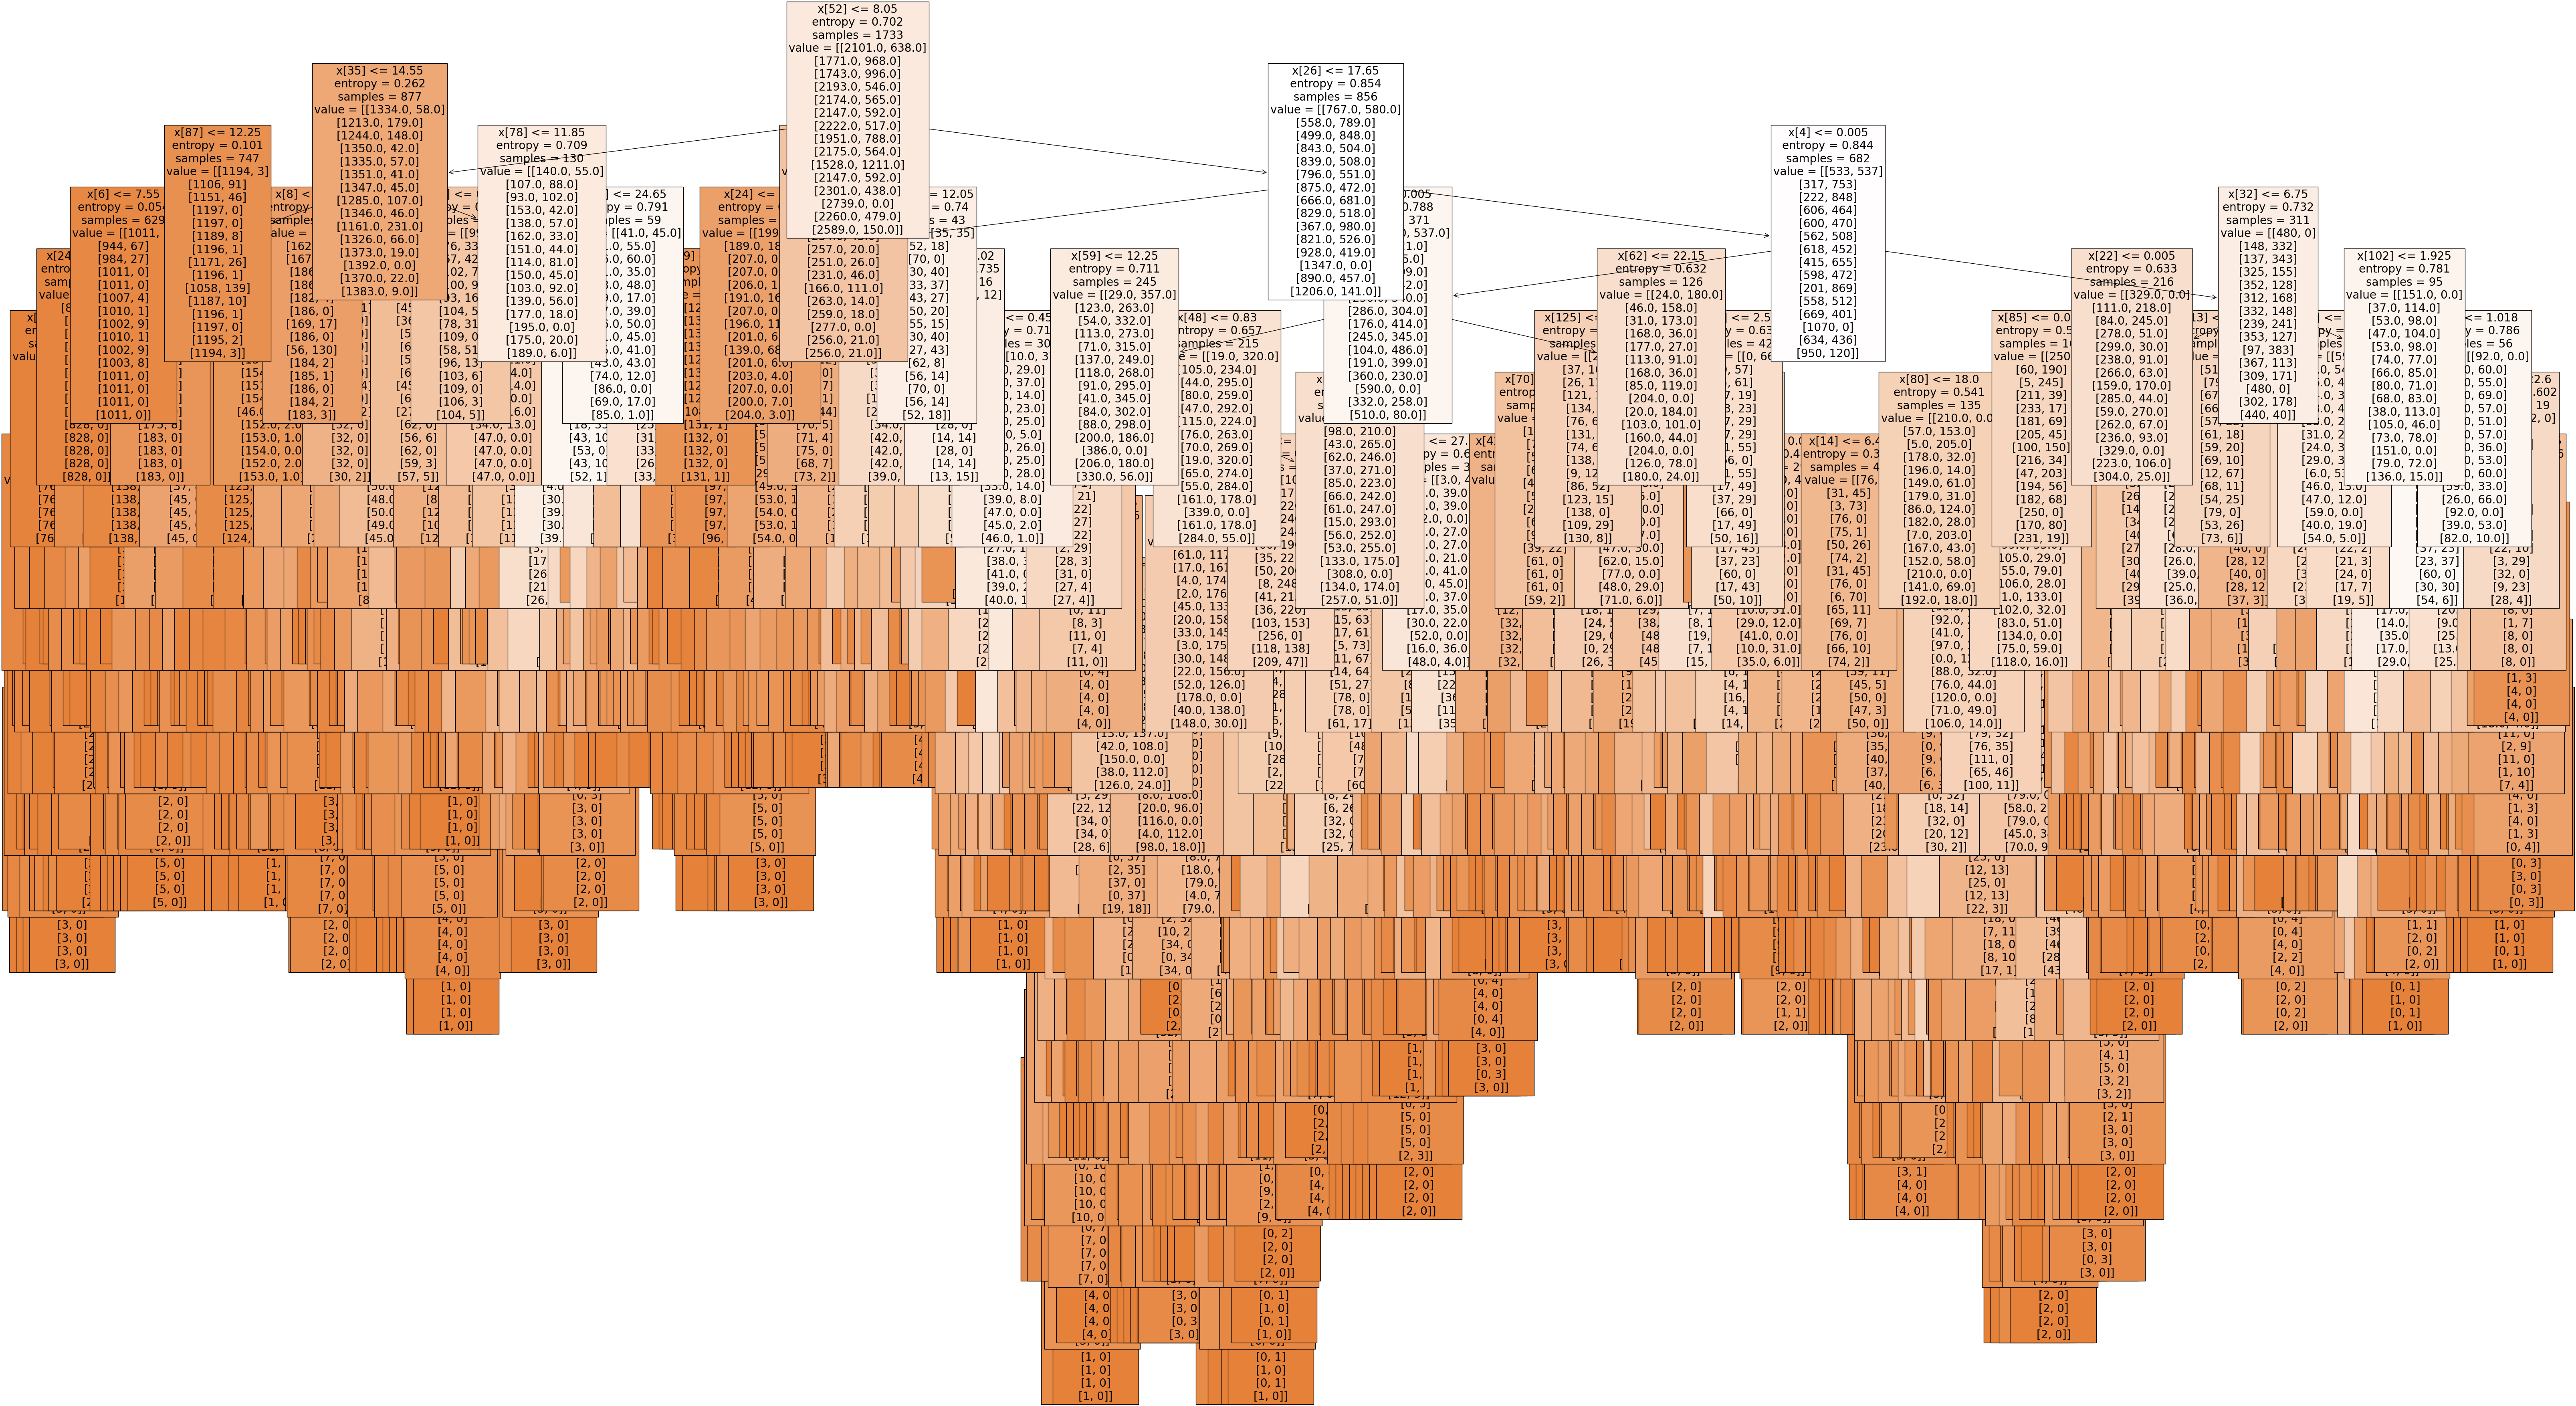

In [67]:
# Plot random forest for decade 1990

fig = plt.figure(figsize=(80,40))

plot_tree(clf3.estimators_[15], fontsize = 20, class_names = ['unpleasant', 'pleasant'], filled=True);

In [69]:
fig.savefig(os.path.join(path, '03 Visuals', 'randomforest2000optimized.png'),bbox_inches='tight')

### 7. Feature Importance

In [72]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_

#print(clf.feature_importances_.shape)
newarray

array([0.0023688 , 0.00320321, 0.00318078, 0.00500311, 0.0125626 ,
       0.00709604, 0.01625025, 0.01022139, 0.01775417, 0.00324692,
       0.00404357, 0.0032429 , 0.00434206, 0.01316562, 0.00448148,
       0.01169531, 0.00564467, 0.011801  , 0.00279053, 0.0037312 ,
       0.00319284, 0.00596753, 0.00880353, 0.00489369, 0.01166964,
       0.01112163, 0.01357436, 0.00434788, 0.00254908, 0.00480909,
       0.00610119, 0.0114623 , 0.00554215, 0.02261328, 0.00276945,
       0.0366399 , 0.00602288, 0.00315014, 0.00423675, 0.00545094,
       0.01426261, 0.00895208, 0.0164082 , 0.00317081, 0.03172376,
       0.0019746 , 0.00311167, 0.00441654, 0.00470782, 0.00784854,
       0.00397024, 0.00871262, 0.0051173 , 0.01696737, 0.00301275,
       0.00472079, 0.00391882, 0.01141672, 0.00447717, 0.018711  ,
       0.00309659, 0.00564672, 0.02257145, 0.00345832, 0.00345625,
       0.00335248, 0.00862517, 0.01159587, 0.00496604, 0.014531  ,
       0.00354959, 0.01339312, 0.00566501, 0.0035162 , 0.00452

In [74]:
# Reshape the feature importances to (-1, 15, 9)

newarray = newarray.reshape(-1, 15, 9)
print(newarray.shape)
newarray

(1, 15, 9)


array([[[0.0023688 , 0.00320321, 0.00318078, 0.00500311, 0.0125626 ,
         0.00709604, 0.01625025, 0.01022139, 0.01775417],
        [0.00324692, 0.00404357, 0.0032429 , 0.00434206, 0.01316562,
         0.00448148, 0.01169531, 0.00564467, 0.011801  ],
        [0.00279053, 0.0037312 , 0.00319284, 0.00596753, 0.00880353,
         0.00489369, 0.01166964, 0.01112163, 0.01357436],
        [0.00434788, 0.00254908, 0.00480909, 0.00610119, 0.0114623 ,
         0.00554215, 0.02261328, 0.00276945, 0.0366399 ],
        [0.00602288, 0.00315014, 0.00423675, 0.00545094, 0.01426261,
         0.00895208, 0.0164082 , 0.00317081, 0.03172376],
        [0.0019746 , 0.00311167, 0.00441654, 0.00470782, 0.00784854,
         0.00397024, 0.00871262, 0.0051173 , 0.01696737],
        [0.00301275, 0.00472079, 0.00391882, 0.01141672, 0.00447717,
         0.018711  , 0.00309659, 0.00564672, 0.02257145],
        [0.00345832, 0.00345625, 0.00335248, 0.00862517, 0.01159587,
         0.00496604, 0.014531  , 0.0035495

In [76]:
# Sum the values across the last dimension to get one observation for each weather station

sumarray = np.sum(newarray[0], axis=1)
sumarray

array([0.07764035, 0.06166353, 0.06574494, 0.09683433, 0.09337818,
       0.05682671, 0.07757201, 0.06692786, 0.09449474, 0.06226856,
       0.07861964, 0.03967938, 0.04595275, 0.04812106, 0.03427595])

In [78]:
# Create list for weather stations

weather_stations = ['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 
                    'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 
                    'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']

In [80]:
important = pd.Series(sumarray, index = weather_stations) #.sort_values(ascending = False)
important = important.sort_values(ascending = False)
important

DEBILT        0.096834
MAASTRICHT    0.094495
DUSSELDORF    0.093378
MUNCHENB      0.078620
BASEL         0.077640
KASSEL        0.077572
LJUBLJANA     0.066928
BUDAPEST      0.065745
MADRID        0.062269
BELGRADE      0.061664
HEATHROW      0.056827
STOCKHOLM     0.048121
SONNBLICK     0.045953
OSLO          0.039679
VALENTIA      0.034276
dtype: float64

In [82]:
# Create a df to associate weather stations with their importances

df_importance = pd.DataFrame({
    'Weather Station': weather_stations,
    'Importance': sumarray
})

df_importance = df_importance.sort_values(by='Importance', ascending = False)

Text(0.5, 1.0, 'Weather Station Importance 2000s Opt.')

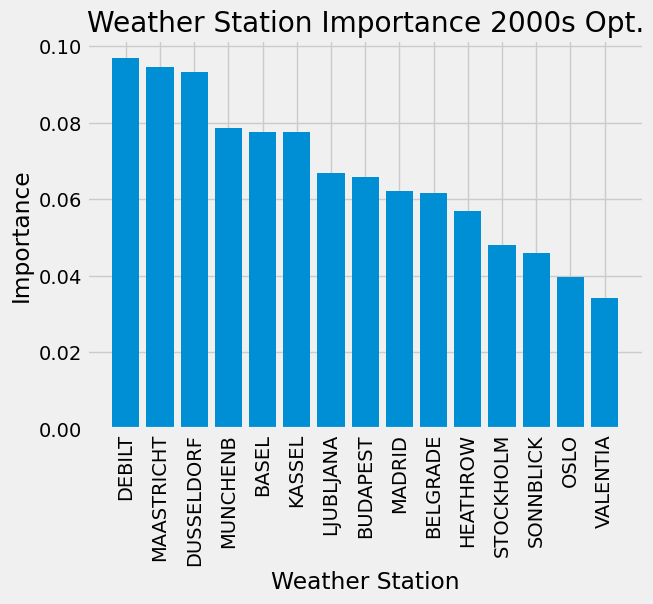

In [84]:
# Plot the importances

%matplotlib inline

plt.style.use('fivethirtyeight')

plt.bar(df_importance['Weather Station'], df_importance['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Weather Station')
plt.ylabel('Importance')
plt.title('Weather Station Importance 2000s Opt.')

### 8. Maastricht

In [87]:
# Create a list of the columns containing "Maastricht" in their names

maas = list(x for x in df.columns if x.find('MAASTRICHT') >=0)
maas

['MAASTRICHT_cloud_cover',
 'MAASTRICHT_humidity',
 'MAASTRICHT_pressure',
 'MAASTRICHT_global_radiation',
 'MAASTRICHT_precipitation',
 'MAASTRICHT_sunshine',
 'MAASTRICHT_temp_mean',
 'MAASTRICHT_temp_min',
 'MAASTRICHT_temp_max']

In [89]:
# Create a dataframe with those columns

dfmaas = df[maas]
dfmaas

MAASTRICHT_cloud_cover  MAASTRICHT_humidity  MAASTRICHT_pressure  \
0                           7                 0.83               1.0063   
1                           8                 0.92               1.0062   
2                           7                 0.97               1.0167   
3                           7                 0.89               1.0277   
4                           7                 0.92               1.0259   
...                       ...                  ...                  ...   
22945                       8                 0.67               1.0201   
22946                       7                 0.70               1.0190   
22947                       8                 0.69               1.0183   
22948                       8                 0.73               1.0181   
22949                       8                 0.80               1.0160   

       MAASTRICHT_global_radiation  MAASTRICHT_precipitation  \
0                             0.22                      0.32   
1                             0.17                      1.34   
2                             0.12                      0.46   
3                             0.16                      0.00   
4                             0.12                      0.56   
...                            ...                       ...   
22945                         1.17                      0.20   
22946                         1.17                      0.20   
22947                         1.17                      0.20   
22948                         1.17                      0.20   
22949                         1.17                      0.20   

       MAASTRICHT_sunshine  MAASTRICHT_temp_mean  MAASTRICHT_temp_min  \
0                      1.0                   9.5                  8.5   
1                      0.4                   8.6                  7.5   
2                      0.0                   6.9                  5.5   
3                      0.3                   7.0                  3.0   
4                      0.0                   8.1                  2.5   
...                    ...                   ...                  ...   
22945                  5.3                  18.6                 14.1   
22946                  5.0                  18.9                 15.8   
22947                  3.2                  18.2                 13.7   
22948                  6.8                  16.3                 12.8   
22949                  3.0                  15.3                 11.0   

       MAASTRICHT_temp_max  
0                     11.1  
1                      9.9  
2                      9.9  
3                     10.0  
4                     11.1  
...                    ...  
22945                 22.6  
22946                 23.5  
22947                 24.3  
22948                 21.4  
22949                 19.4  

[22950 rows x 9 columns]

In [91]:
# Reduce pleasant weather to Maastricht

pleasantmaas = pleasant['MAASTRICHT_pleasant_weather']
pleasantmaas

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: MAASTRICHT_pleasant_weather, Length: 22950, dtype: int64

In [93]:
# Turn X2 and y2 from df to arrays

X = np.array(dfmaas)
y = np.array(pleasantmaas)

In [95]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [97]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


### 9. Grid search

In [100]:
# Create a RF classifier

clf= RandomForestClassifier()

In [104]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [106]:
start = time.time()
grid = GridSearchCV(clf,param_grid=grid_space,cv=3,scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


C:\Users\nodnarb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nodnarb\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nodnarb\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\nodnarb\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\nodnarb\anaconda3\Lib\

Search took 0.7120389739672343 minutes


In [108]:
# grid search results
print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


### 10. Random search

In [111]:
# Random search cv
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [113]:
# creating a RF classifier
clf2= RandomForestClassifier()

In [115]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3) #500
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 1.0782976309458414 minutes


In [117]:
# random random search results
print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'entropy', 'max_depth': 40, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 210}
Best RANDOM search score is: 1.0


### 11. Maastricht Grid Search Random Forest

In [120]:
# creating a RF classifier with the best results from above
clf3 = RandomForestClassifier(n_estimators = 10, max_depth=3, max_features=7, min_samples_leaf=1, min_samples_split=2, criterion = 'entropy')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=7,
                       n_estimators=10)

In [122]:
# Perform predictions on the test dataset
y_pred = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


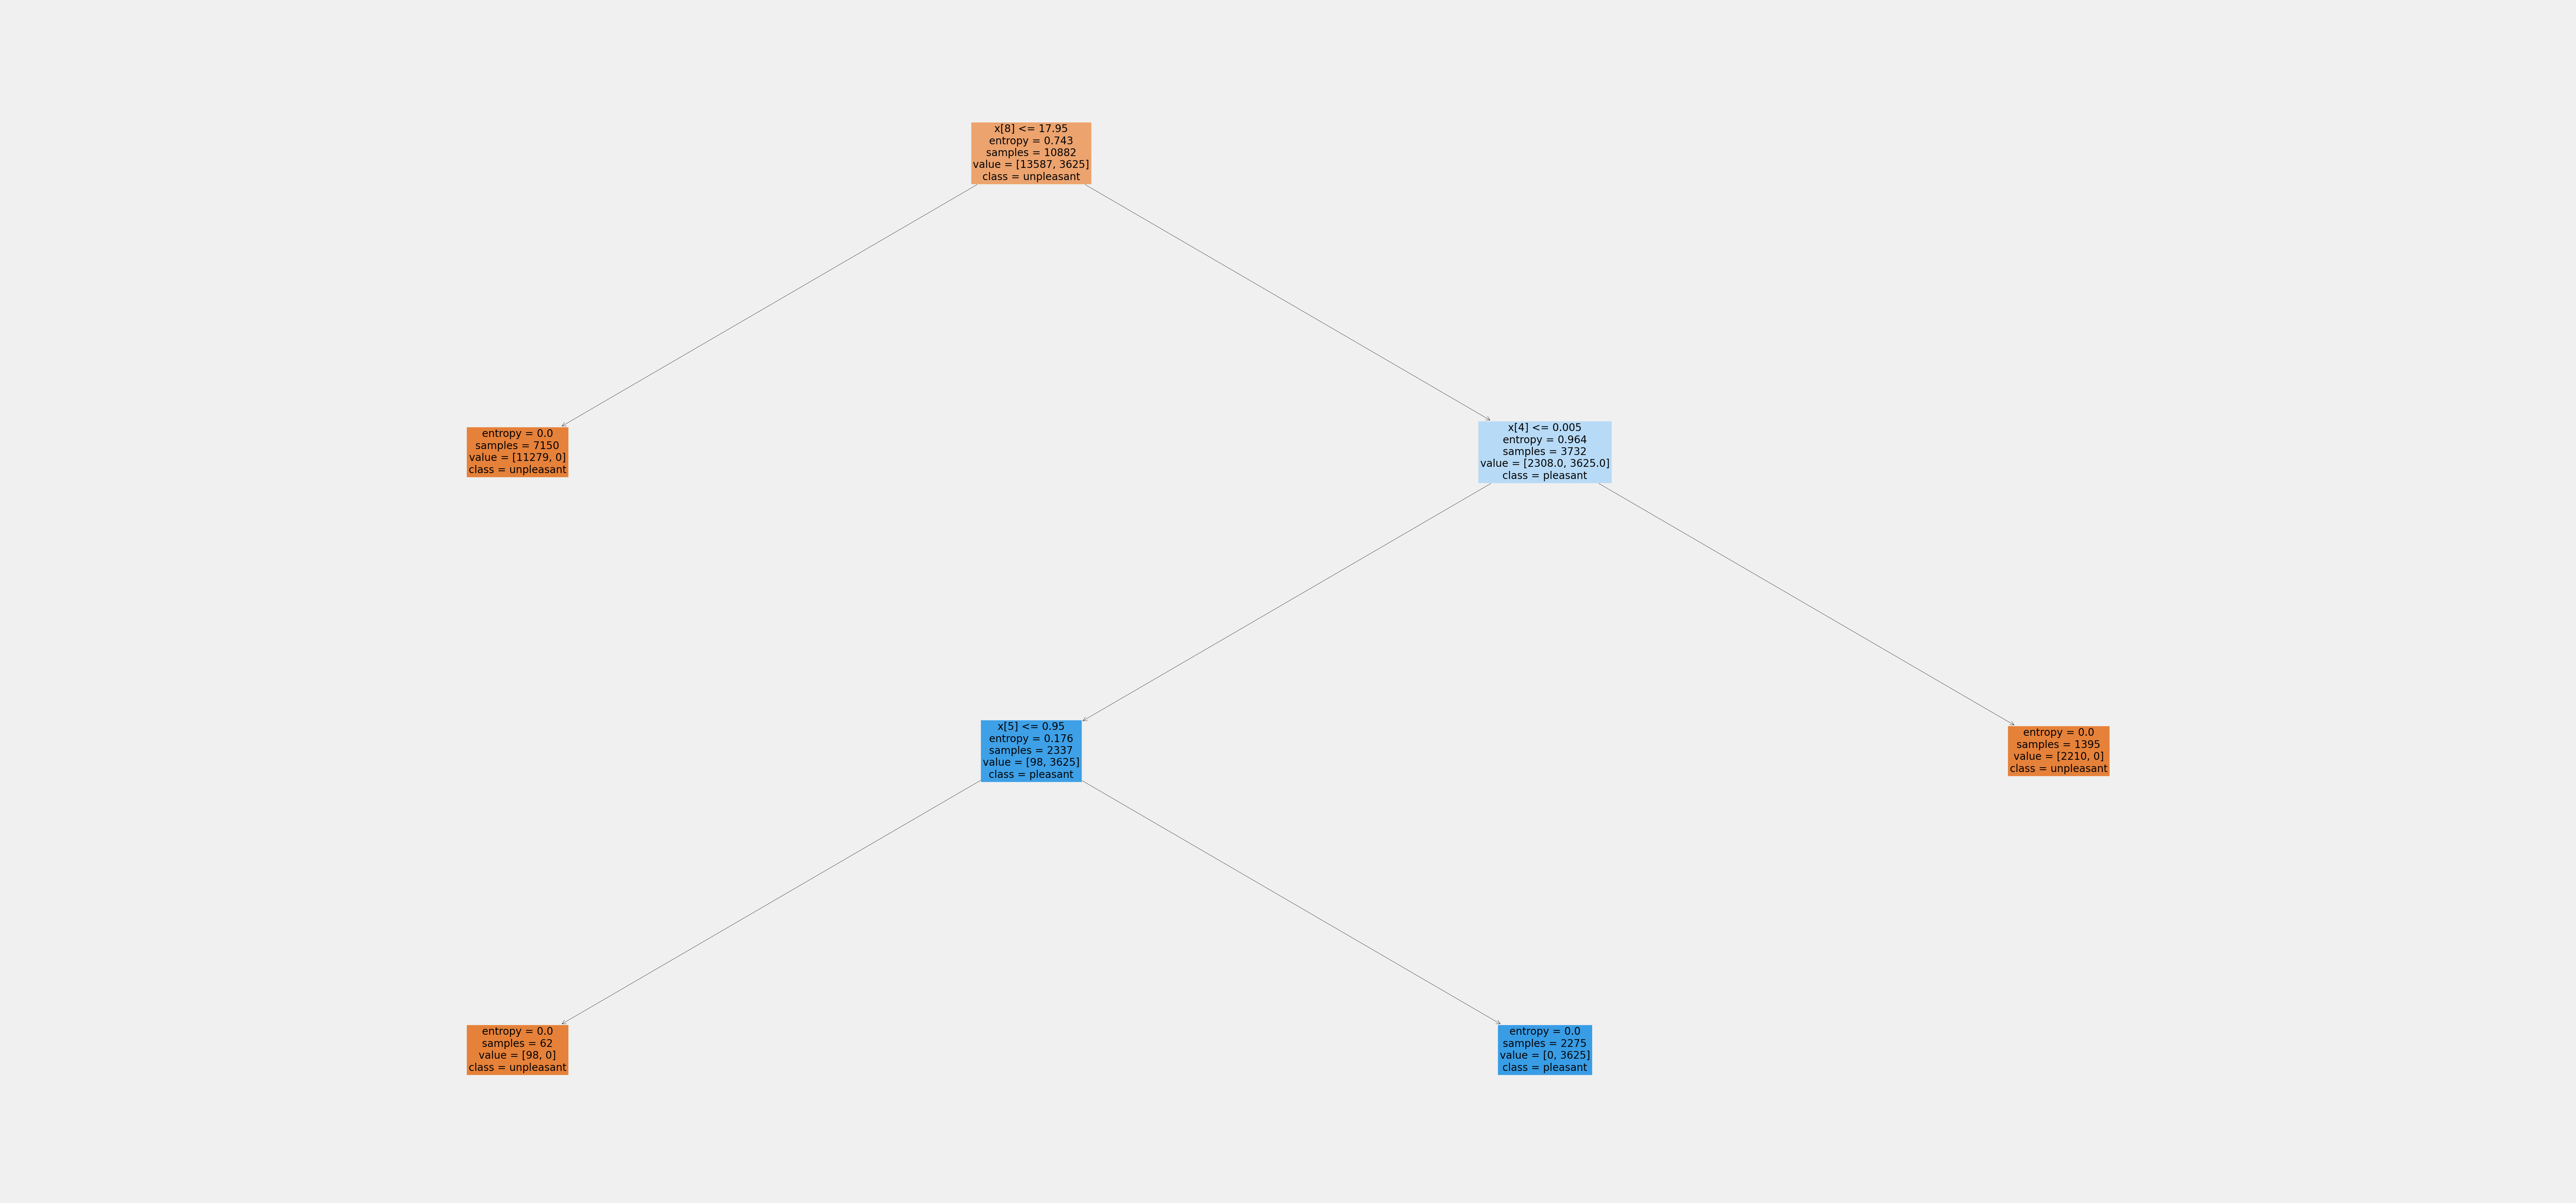

In [128]:
# Plot random forest for decade 1990

fig2 = plt.figure(figsize=(80,40))

plot_tree(clf3.estimators_[6], fontsize = 20, class_names = ['unpleasant', 'pleasant'], filled=True);

In [130]:
fig2.savefig(os.path.join(path, '03 Visuals', 'maastrichtoptimized.png'),bbox_inches='tight')

### 12. Feature Importance

In [133]:
np.set_printoptions(threshold=np.inf)
newarray = clf3.feature_importances_

#print(clf.feature_importances_.shape)
newarray

array([0.03619123, 0.        , 0.        , 0.        , 0.35550702,
       0.03031024, 0.09594758, 0.        , 0.48204393])

In [135]:
# Create a list of weather features

features = [feature.replace('MAASTRICHT_', '') for feature in maas]
features

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [137]:
important = pd.Series(newarray, index = features)
important

cloud_cover         0.036191
humidity            0.000000
pressure            0.000000
global_radiation    0.000000
precipitation       0.355507
sunshine            0.030310
temp_mean           0.095948
temp_min            0.000000
temp_max            0.482044
dtype: float64

In [139]:
# Create a df to associate weather stations with their importances

df_importance1 = pd.DataFrame({
    'Features': features,
    'Importance': important
})

df_importance1 = df_importance1.sort_values(by='Importance', ascending = False)

Text(0.5, 1.0, 'Maastricht Features Opt.')

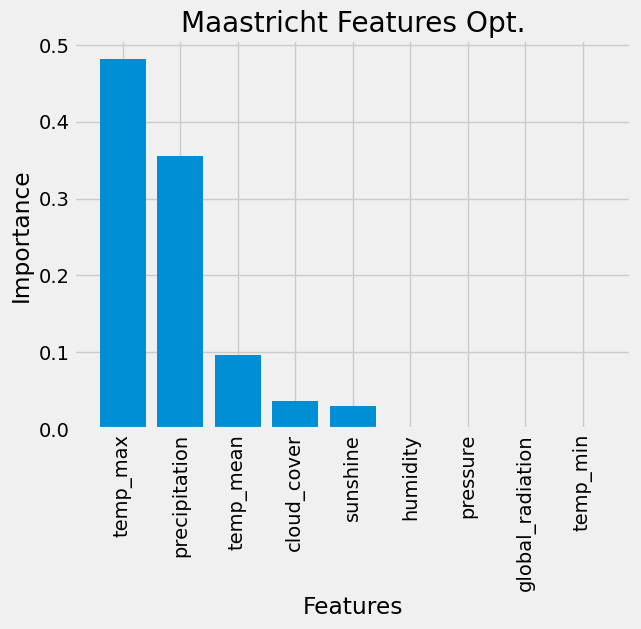

In [141]:
# Plot the importances

%matplotlib inline

plt.style.use('fivethirtyeight')

plt.bar(df_importance1['Features'], df_importance1['Importance'], orientation = 'vertical')
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Maastricht Features Opt.')